In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tike

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('font', family='Times New Roman')
plt.rcParams["mathtext.fontset"] = 'stix'

#width = 3.37 or 6.69 eps are preferred

In [3]:
mura_psi = np.load('512-mura-cgrad-100.npz.npy')
boxc_psi = np.load('512-boxcar-cgrad-100.npz.npy')

In [10]:
def plot_amp(A, psi, vmin=0, vmax=1.1):
    img = np.abs(psi)
    A.imshow(img, vmin=vmin, vmax=vmax)
    A1 = A.inset_axes([-0.1, -0.1, 0.4, 0.4])
    A1.imshow(img, vmin=vmin, vmax=vmax)
    A1.set_xlim(50, 150)
    A1.set_ylim(200, 100)
    A1.axis('off')
    A.indicate_inset_zoom(A1)

def plot_ang(A, psi, vmin=-np.pi, vmax=np.pi):
    img = np.angle(psi)
    A.imshow(img, vmin=vmin, vmax=vmax, cmap=plt.cm.twilight)
    A1 = A.inset_axes([-0.1, -0.1, 0.4, 0.4])
    A1.imshow(img, vmin=vmin, vmax=vmax, cmap=plt.cm.twilight)
    A1.set_xlim(150, 210)
    A1.set_ylim(160, 220)
    A1.axis('off')
    A.indicate_inset_zoom(A1)

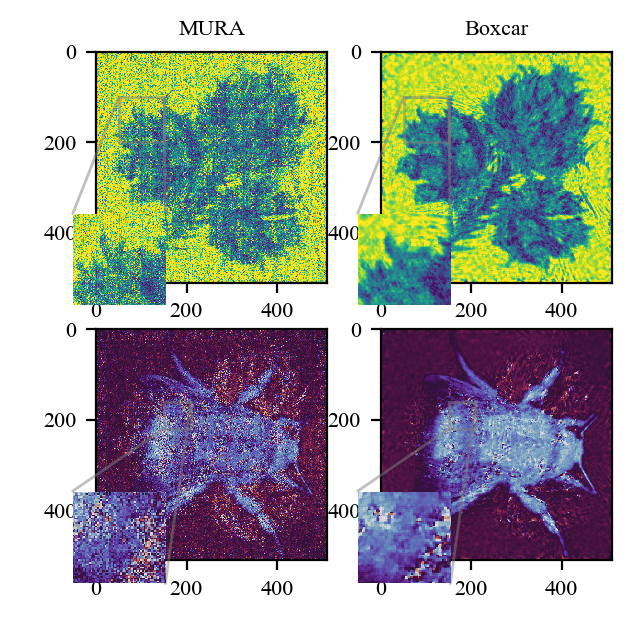

In [11]:
plt.figure(figsize=(3.37, 3.37), dpi=200)

A = plt.subplot(2, 2, 1)
plot_amp(A, mura_psi)
plt.title('MURA')

B = plt.subplot(2, 2, 2)
plot_amp(B, boxc_psi)
plt.title('Boxcar')

C = plt.subplot(2, 2, 3)
plot_ang(C, mura_psi)

D = plt.subplot(2, 2, 4)
plot_ang(D, boxc_psi)

# plt.subplots_adjust(left=0.05, right=1, bottom=0.05, top=0.95)
plt.savefig('figures/recon_compare.pdf', dpi=600)